# Proyek Analisis Data: E-commerce Public Dataset
- **Nama:** Sarah Suwarno
- **Email:** sarahsw1213@gmail.com
- **ID Dicoding:** sarah_suwarno_J9Ej

## Menentukan Pertanyaan Bisnis

Analisa dilakukan dengan tujuan memberikan insight serta informasi terkait perilaku konsumen di setiap daerah/state di Brazil. Aspek-aspek yang akan dianalisa ada beragam, mulai dari harga, jenis barang/product, metode pembayaran, serta lokasi penjual dari product yang dibeli.

Hasil analisa akan menjawab pertanyaan berikut:


- bagaimana tren harga produk yang dibeli di brazil setiap tahunnya?
- apa produk yang sering dibeli di Brazil?
- apa metode pembayaran yang sering digunakan di Brazil?
- daerah (state) mana yang paling sering membeli produk e-commerce di Brazil?

Perlu diingat bahwa analisa ini dilakukan tidak terbatas hanya untuk menjawab pertanyaan-pertanyaan di atas, melainkan juga untuk menemukan insight baru terkait perilaku konsumen

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

Analisa ini akan difokuskan pada beberapa aspek penting, yaitu:
1. Harga produk
2. Jenis Barang
3. Metode Pembayaran
4. State di Brazil (lokasi pembeli)
5. State di Brazil (lokasi penjual)

tiap aspek ini akan dijadikan feature pada dataset kita. Namun, karena feature-feature ini tersebar di file csv yang berbeda, maka kita perlu meng-ekstrak feature-feature tersebut menggunakan metode 'JOIN'

metode 'JOIN' ini mirip seperti metode 'JOIN' pada SQL

### Gathering Data

mula-mula, kita perlu mengetahui feature-feature yang ada pada tiap dataset. kemudian, untuk melakukan metode JOIN kita perlu mencari feature yang beririsan diantara tiap dataset tersebut.

Mari kita cek list feature dari masing-masing dataset.

In [2]:
#membaca file csv

order_items = pd.read_csv(r"order_items_dataset.csv", encoding='unicode_escape')
order_payments = pd.read_csv(r"order_payments_dataset.csv", encoding='unicode_escape')
order_reviews = pd.read_csv(r"order_reviews_dataset.csv", encoding='unicode_escape')
order = pd.read_csv(r"orders_dataset.csv", encoding='unicode_escape')
category_name_en = pd.read_csv(r"product_category_name_translation.csv", encoding='unicode_escape')
product = pd.read_csv(r"products_dataset.csv", encoding='unicode_escape')
seller = pd.read_csv(r"sellers_dataset.csv", encoding='unicode_escape')
customer = pd.read_csv(r"customers_dataset.csv", encoding='unicode_escape')
geolocation= pd.read_csv(r"geolocation_dataset.csv", encoding='unicode_escape')






In [3]:
#mengecek kolom yang ada di tiap dataset

df = [order_items, order_payments,order_reviews,order,category_name_en,product,seller,customer,geolocation]

for dataset in df:
    columns_list = dataset.columns.tolist()
    print (columns_list)

['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']
['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']
['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']
['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
['ï»¿product_category_name', 'product_category_name_english']
['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state']
['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']
['geolocation_zip_code_prefix', 'geol

disini dapat kita lihat untuk ada kolom di setiap dataset yang ada juga di dataset lainnya. dengan demikian kita dapat melakukan operasi JOIN 

berikut adalah kolom yang kita butuhkan beserta lokasi datasetnya

1. Harga: ada di kolom 'price' di dataset 'order_items'
2. Jenis barang: ada di kolom 'product_category_name' di dataset 'product' serta translasi nama produknya ada di dataset 'product_category_name_transation' di kolom 'product_category_name_english'
3. Metode pembayaran: ada di kolom 'payment_type' di dataset 'order_payments'
4. Daerah pembeli: ada di kolom 'state' di dataset 'customers'
5. Daerah penjual: ada di kolom 'state' di dataset 'sellers'

selain itu, kita dapat menggunakan kolom yang beririsan untuk menghubungkan dua dataset menggunakan operasi JOIN. penjelasannya adalah sebagai berikut:

1. dataset customers dan order memiliki kolom yang beririsan 'customer_id'
2. dataset order, order_payments, dan order_items memiliki kolom yang beririsan 'order_id'
3. dataset order_items dan product memiliki kolom yang beririsan 'product_id'
4. dataset order_items dan sellers memiliki kolom yang beririsan 'seller_id'
5. dataset product_category_name dan product memiliki kolom yang beririsan 'category_name'

In [4]:
#lakukan operasi inner join untuk dataset customers dan order
result1 = pd.merge(customer, order, on='customer_id', how='inner')
 

In [5]:
#lakukan operasi inner join untuk result1 dengan order_payment
result2 = pd.merge(result1, order_payments, on='order_id', how='inner')


In [6]:
#lakukan operasi inner join untuk result2 dengan order_payment
result3 = pd.merge(result2, order_items, on='order_id', how='inner')


In [7]:
#lakukan operasi inner join untuk result3 dengan product
result4 = pd.merge(result3, product, on='product_id', how='inner')


In [8]:
#lakukan operasi inner join untuk result4 dengan seller
result5 = pd.merge(result4, seller, on='seller_id', how='inner')


In [9]:
#ganti nama kolom pada dataset category_name_en
new_column_name = {'ï»¿product_category_name': 'product_category_name', 'product_category_name_english': 'product_category_name_english'}

category_name_en_rename = category_name_en.rename(columns=new_column_name)


In [10]:
#lakukan operasi inner join untuk result5 dengan category_name_en_rename
result6 = pd.merge(result5, category_name_en_rename, on='product_category_name', how='inner')

### Assessing Data

In [11]:
#mari kita cek data terbaru yang kita miliki
cek_data = result6.info()
print (cek_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115878 entries, 0 to 115877
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    115878 non-null  object 
 1   customer_unique_id             115878 non-null  object 
 2   customer_zip_code_prefix       115878 non-null  int64  
 3   customer_city                  115878 non-null  object 
 4   customer_state                 115878 non-null  object 
 5   order_id                       115878 non-null  object 
 6   order_status                   115878 non-null  object 
 7   order_purchase_timestamp       115878 non-null  object 
 8   order_approved_at              115864 non-null  object 
 9   order_delivered_carrier_date   114673 non-null  object 
 10  order_delivered_customer_date  113383 non-null  object 
 11  order_estimated_delivery_date  115878 non-null  object 
 12  payment_sequential            

### Cleaning Data

setelah mendapatkan dataset yang kita perlukan, kita dapat membuang feature-feature yang tidak kita butuhkan.

In [12]:
#membuang feature yang tidak dibutuhkan
columns_to_keep = ['customer_id','customer_city', 'customer_state','order_id','order_status','order_purchase_timestamp','payment_type','product_id','seller_id','price','product_category_name','product_category_name_english']

result = result6[columns_to_keep]

In [13]:
tes = result.info()
print(tes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115878 entries, 0 to 115877
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    115878 non-null  object 
 1   customer_city                  115878 non-null  object 
 2   customer_state                 115878 non-null  object 
 3   order_id                       115878 non-null  object 
 4   order_status                   115878 non-null  object 
 5   order_purchase_timestamp       115878 non-null  object 
 6   payment_type                   115878 non-null  object 
 7   product_id                     115878 non-null  object 
 8   seller_id                      115878 non-null  object 
 9   price                          115878 non-null  float64
 10  product_category_name          115878 non-null  object 
 11  product_category_name_english  115878 non-null  object 
dtypes: float64(1), object(11)
memo

terlihat bahwa feature yang kita miliki tidak mempunyai missing value

kemudian, karena feature order_purchase_timestamp masih berbentuk string, maka kita perlu mengubahnya agar bentuknya menjadi date-time

In [14]:
#mengubah feature order_purchase_timestamp dari string menjadi date-time
result['order_purchase_timestamp_new'] = pd.to_datetime(result['order_purchase_timestamp'])


C:\Users\suwarno\AppData\Local\Temp\ipykernel_61736\1928868601.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['order_purchase_timestamp_new'] = pd.to_datetime(result['order_purchase_timestamp'])


In [15]:
#mengubah feature order_purchase_timestamp_new menjadi date format
result['order_purchase_date'] = pd.to_datetime(result['order_purchase_timestamp_new'], format='%Y-%m-%d').dt.date

C:\Users\suwarno\AppData\Local\Temp\ipykernel_61736\2936055577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['order_purchase_date'] = pd.to_datetime(result['order_purchase_timestamp_new'], format='%Y-%m-%d').dt.date


In [16]:
#drop feature yang tidak digunakan
delete_column = ['order_purchase_timestamp_new','order_purchase_timestamp']

result = result.drop(columns=delete_column)

In [17]:
#menyimpan dataframe result menjadi file csv untuk backup
result.to_csv('result.csv', index=False)


In [18]:
result_new = pd.read_csv(r"result_file.csv", encoding='unicode_escape')

In [19]:
print(result_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115878 entries, 0 to 115877
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    115878 non-null  object 
 1   customer_city                  115878 non-null  object 
 2   customer_state                 115878 non-null  object 
 3   order_id                       115878 non-null  object 
 4   order_status                   115878 non-null  object 
 5   payment_type                   115878 non-null  object 
 6   product_id                     115878 non-null  object 
 7   seller_id                      115878 non-null  object 
 8   price                          115878 non-null  float64
 9   product_category_name          115878 non-null  object 
 10  product_category_name_english  115878 non-null  object 
 11  order_purchase_date            115878 non-null  object 
dtypes: float64(1), object(11)
memo

kemudian, kita cari outlier dari data numerik 'Price'

In [20]:
#mengurutkan feature numerik 'price'
result_new = result_new.sort_values(by='price', ascending=True)


In [21]:
# mencari outlier menggunakan IQR
# menghitung IQR
Q1 = result_new['price'].quantile(0.25)
Q3 = result_new['price'].quantile(0.75)
IQR = Q3 - Q1

# mencari lower bound dan upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# menghitung banyaknya outlier
outliers = result_new[(result_new['price'] < lower_bound) | (result_new['price'] > upper_bound)].count()

# menampilkan hasil
print("how many outliers")
print(outliers)
print("\nlower bound:")
print(lower_bound)
print("\nupper bound:")
print(upper_bound)

how many outliers
customer_id                      8753
customer_city                    8753
customer_state                   8753
order_id                         8753
order_status                     8753
payment_type                     8753
product_id                       8753
seller_id                        8753
price                            8753
product_category_name            8753
product_category_name_english    8753
order_purchase_date              8753
dtype: int64

lower bound:
-102.6

upper bound:
277.4


dari sini dapat terlihat bahwa ada 8753 outlier dari feature Price. dimana lower bound nya adalah -102.6 dan 277.4
namun, dikarenakan data Price seharusnya tidak memiliki nilai negatif, maka lower bound nya akan kita ubah menjadi nilai 0.

Kemudian, kita perlu membersihkan outlier tersebut

In [22]:
# Definisikan kondisi
kondisi1 = result_new['price'] > 0
kondisi2 = result_new['price'] < 277.4

# gabungkan kondisi tersebut menggunakan '&' (AND)
result_clean = result_new[kondisi1 & kondisi2]




In [23]:
print(result_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 107125 entries, 99650 to 14891
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    107125 non-null  object 
 1   customer_city                  107125 non-null  object 
 2   customer_state                 107125 non-null  object 
 3   order_id                       107125 non-null  object 
 4   order_status                   107125 non-null  object 
 5   payment_type                   107125 non-null  object 
 6   product_id                     107125 non-null  object 
 7   seller_id                      107125 non-null  object 
 8   price                          107125 non-null  float64
 9   product_category_name          107125 non-null  object 
 10  product_category_name_english  107125 non-null  object 
 11  order_purchase_date            107125 non-null  object 
dtypes: float64(1), object(11)
memory

terlihat bahwa outlier feature numerik telah dibersihkan

## Exploratory Data Analysis (EDA)

### Explore ...

we're already at our fun part.
Mula-mula, kita dapat mengecek feature kategori. Hal yang dapat dicek dari feature kategori adalah:
1. value
2. frekuensi dari setiap value

In [24]:
columns = result_clean.columns.tolist()
print(columns)


['customer_id', 'customer_city', 'customer_state', 'order_id', 'order_status', 'payment_type', 'product_id', 'seller_id', 'price', 'product_category_name', 'product_category_name_english', 'order_purchase_date']


In [25]:
categorical_variable = ['customer_city', 'customer_state','order_status', 'payment_type','product_category_name', 'product_category_name_english']

for feature in categorical_variable:
    kategori = result_clean[feature].unique()
    print("value di feature {} adalah {}\n".format(feature, kategori))



value di feature customer_city adalah ['duque de caxias' 'cotia' 'hortolandia' ... 'angical' 'ipaumirim'
 'magalhaes de almeida']

value di feature customer_state adalah ['RJ' 'SP' 'PR' 'RS' 'MG' 'SC' 'GO' 'DF' 'PB' 'PA' 'BA' 'ES' 'PE' 'MS'
 'MT' 'CE' 'TO' 'AM' 'MA' 'AL' 'RO' 'RN' 'PI' 'AC' 'SE' 'RR' 'AP']

value di feature order_status adalah ['delivered' 'processing' 'shipped' 'canceled' 'invoiced' 'approved'
 'unavailable']

value di feature payment_type adalah ['credit_card' 'boleto' 'voucher' 'debit_card']

value di feature product_category_name adalah ['construcao_ferramentas_construcao' 'beleza_saude' 'papelaria' 'pet_shop'
 'utilidades_domesticas' 'automotivo' 'artes' 'bebes' 'musica'
 'fashion_underwear_e_moda_praia' 'informatica_acessorios' 'eletronicos'
 'esporte_lazer' 'sinalizacao_e_seguranca' 'moveis_decoracao' 'brinquedos'
 'instrumentos_musicais' 'perfumaria' 'telefonia' 'consoles_games'
 'artigos_de_natal' 'telefonia_fixa' 'fashion_bolsas_e_acessorios'
 'bebidas' 'livr

kemudian kita dapat mencari persentase dan frekuensi dari tiap value tersebut.
feature yang menarik untuk ditinjau adalah:
1. customer_state untuk mencari tahu pesebaran konsumen di Brazil
2. payment_type untuk mencari tahu jenis pembayaran yang digunakan
3. product_category_name untuk mencari tahu jenis produk yang dibeli

In [26]:
kategori_tinjau = ['customer_state', 'payment_type','product_category_name_english']

for feature in kategori_tinjau:
    frekuensi = result_clean[feature].value_counts()
    persentase = result_clean[feature].value_counts(normalize = True)
    print("frekuensi tiap value di feature {} adalah \n{}\n".format(feature, frekuensi))
    print("persentase tiap value di feature {} adalah \n{}\n".format(feature, persentase))


frekuensi tiap value di feature customer_state adalah 
customer_state
SP    45745
RJ    13967
MG    12497
RS     5898
PR     5445
SC     3896
BA     3608
DF     2264
ES     2163
GO     2162
PE     1663
CE     1312
PA      957
MT      950
MS      761
MA      734
PB      521
RN      489
PI      488
AL      378
SE      345
TO      282
RO      245
AM      155
AC       79
AP       76
RR       45
Name: count, dtype: int64

persentase tiap value di feature customer_state adalah 
customer_state
SP    0.427025
RJ    0.130380
MG    0.116658
RS    0.055057
PR    0.050828
SC    0.036369
BA    0.033680
DF    0.021134
ES    0.020191
GO    0.020182
PE    0.015524
CE    0.012247
PA    0.008933
MT    0.008868
MS    0.007104
MA    0.006852
PB    0.004863
RN    0.004565
PI    0.004555
AL    0.003529
SE    0.003221
TO    0.002632
RO    0.002287
AM    0.001447
AC    0.000737
AP    0.000709
RR    0.000420
Name: proportion, dtype: float64

frekuensi tiap value di feature payment_type adalah 
payment_type
cre

kemudian, mari kita tinjau feature numeriknya.
untuk feature numerik kita dapat meninjau central tendency nya, yaitu:
1. mean
2. median
3. mode

mari kita coba

In [27]:
mean = result_clean['price'].mean()
median = result_clean['price'].median()
mode = result_clean['price'].mode()

print("nilai rata-rata dari feature Price adalah {}".format(mean))
print("nilai median dari feature Price adalah {}".format(median))
print("nilai modus dari feature Price adalah {}".format(mode))

nilai rata-rata dari feature Price adalah 83.8307429638273
nilai median dari feature Price adalah 69.0
nilai modus dari feature Price adalah 0    59.9
Name: price, dtype: float64


kemudian, kita juga dapat mengukur pesebaran data pada feature numerik, yaitu:
1. min dan max
2. range
3. quartile 1,2,3
4. IQR atau inter-quartile range

mari kita coba

In [28]:
min = result_clean['price'].min()
max = result_clean['price'].max()
range = max - min
q1, q3 = np.quantile(result_clean['price'],[.25, .75])
IQR = q3 - q1

print("nilai min dari feature Price adalah {}".format(min))
print("nilai max dari feature Price adalah {}".format(max))
print("nilai range dari feature Price adalah {}".format(range))
print("nilai IQR dari feature Price adalah {}".format(IQR))


nilai min dari feature Price adalah 0.85
nilai max dari feature Price adalah 277.3
nilai range dari feature Price adalah 276.45
nilai IQR dari feature Price adalah 79.1


kemudian, kita juga dapat meng-visualisasikan pesebaran dari feature numerik menggunakan histogram

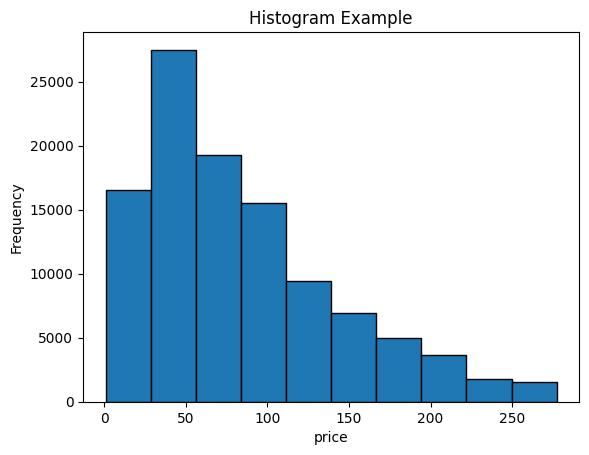

In [29]:
# Plot histogram
plt.hist(result_clean['price'], bins=10, edgecolor='black')  # 'bins' parameter controls the number of bins

# beri labels dan judul
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('Histogram Example')

# display histogram
plt.show()

terlihat bahwa pesebaran data price cenderung right-skewed, yang menandakan bahwa nilai modus nya kurang dari nilai rata-rata. hal ini menunjukkan bahwa kebanyakan konsumen cenderung membeli barang yang harganya kurang dari harga rata-rata, yaitu < 83.83

Kemudian, kita dapat mencari tahu tren harga barang yang dibeli per tahun nya dari 2016 hingga 2018.

In [30]:
result_clean['order_purchase_date_dt'] = pd.to_datetime(result_clean['order_purchase_date'])

C:\Users\suwarno\AppData\Local\Temp\ipykernel_61736\3306612318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_clean['order_purchase_date_dt'] = pd.to_datetime(result_clean['order_purchase_date'])


In [31]:
result_clean.drop(columns=['order_purchase_date'], inplace=True)

C:\Users\suwarno\AppData\Local\Temp\ipykernel_61736\1859320541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_clean.drop(columns=['order_purchase_date'], inplace=True)


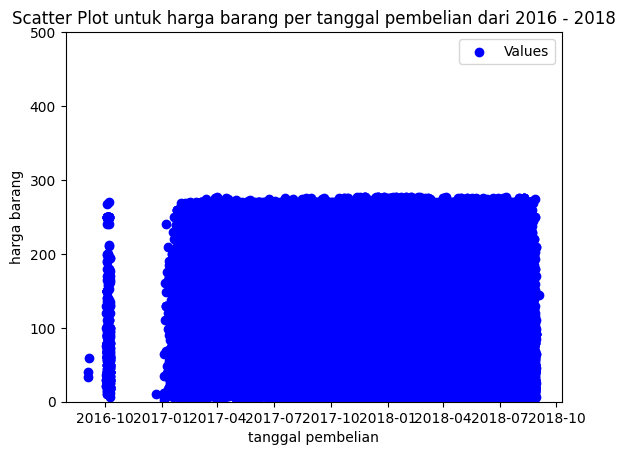

In [32]:
#tentukan nilai y untuk di-display
y_min = 0  # Minimum y-axis 
y_max = 500  # Maximum y-axis 

# Plot scatter plot
plt.scatter(result_clean['order_purchase_date_dt'], result_clean['price'], color='blue', label='Values')

# set range untuk y-axis
plt.ylim(y_min, y_max)

# beri label dan judul
plt.xlabel('tanggal pembelian')
plt.ylabel('harga barang')
plt.title('Scatter Plot untuk harga barang per tanggal pembelian dari 2016 - 2018')
plt.legend()

# Show the plot
plt.show()

terlihat bahwa dari bulan oktober 2016 hingga januari 2017 tidak ada barang yang dibeli. menarik. sepertinya ada data yang hilang di antara bulan oktober 2016 hingga januari 2017.

## Visualization & Explanatory Analysis

### Pertanyaan 1: bagaimana tren harga produk yang dibeli tiap tahunnya?

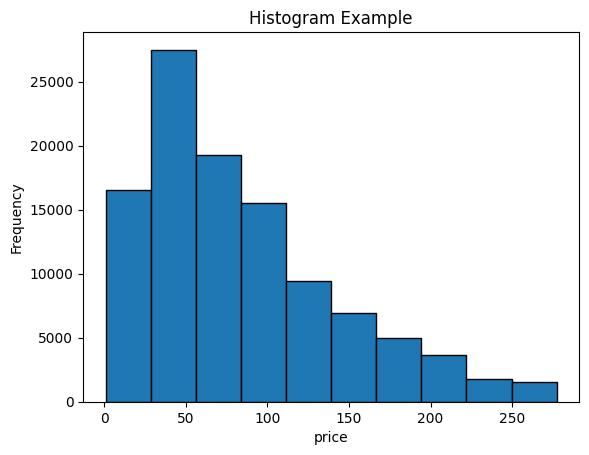

In [33]:
# Plot histogram
plt.hist(result_clean['price'], bins=10, edgecolor='black')  # 'bins' parameter controls the number of bins

# beri labels dan judul
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('Histogram Example')

# display histogram
plt.show()

terlihat bahwa pesebaran data price cenderung right-skewed, yang menandakan bahwa nilai modus nya kurang dari nilai rata-rata. hal ini menunjukkan bahwa kebanyakan konsumen cenderung membeli barang yang harganya kurang dari harga rata-rata, yaitu < 83.83

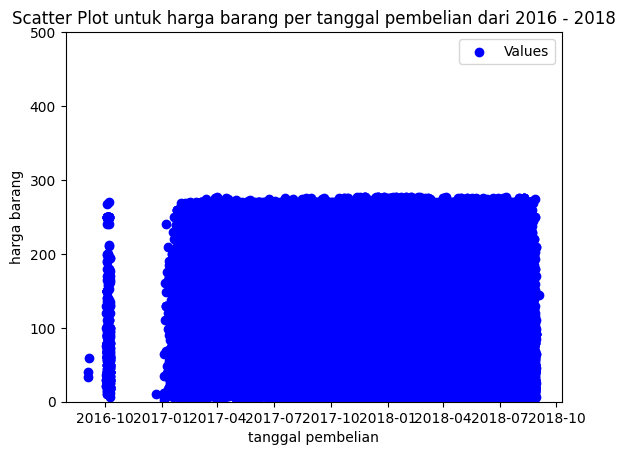

In [34]:
#tentukan nilai y untuk di-display
y_min = 0  # Minimum y-axis 
y_max = 500  # Maximum y-axis 

# Plot scatter plot
plt.scatter(result_clean['order_purchase_date_dt'], result_clean['price'], color='blue', label='Values')

# set range untuk y-axis
plt.ylim(y_min, y_max)

# beri label dan judul
plt.xlabel('tanggal pembelian')
plt.ylabel('harga barang')
plt.title('Scatter Plot untuk harga barang per tanggal pembelian dari 2016 - 2018')
plt.legend()

# Show the plot
plt.show()

terlihat bahwa konsumen cenderung membei barang dengan harga kurang dari 300

### Pertanyaan 2: apa produk yang sering dibeli di brazil?

In [35]:
result_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107125 entries, 99650 to 14891
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    107125 non-null  object        
 1   customer_city                  107125 non-null  object        
 2   customer_state                 107125 non-null  object        
 3   order_id                       107125 non-null  object        
 4   order_status                   107125 non-null  object        
 5   payment_type                   107125 non-null  object        
 6   product_id                     107125 non-null  object        
 7   seller_id                      107125 non-null  object        
 8   price                          107125 non-null  float64       
 9   product_category_name          107125 non-null  object        
 10  product_category_name_english  107125 non-null  object        
 11  or

<Axes: title={'center': 'Bar Chart untuk 10 produk dengan frekuensi terbanyak'}, xlabel='product_category_name_english'>

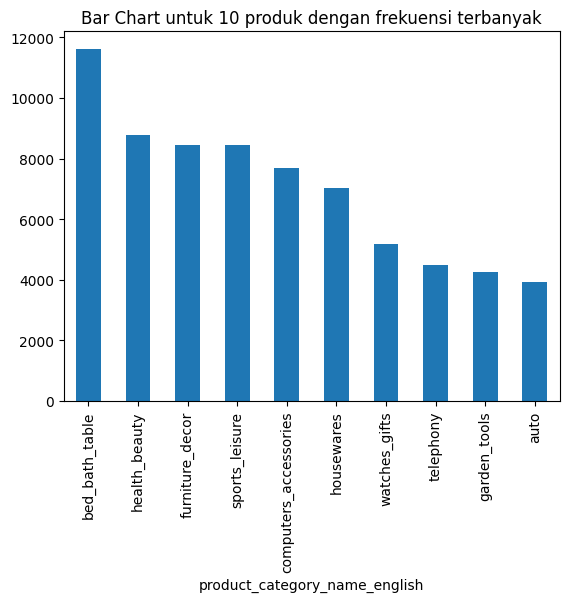

In [38]:
result_clean.product_category_name_english.value_counts().nlargest(10).plot.bar(title = "Bar Chart untuk 10 produk dengan frekuensi terbanyak")

### Pertanyaan 3: apa metode pembayaran yang paling sering digunakan di Brazil?

<Axes: title={'center': 'Bar Chart untuk metode pembayaran yang digunakan di Brazil'}, xlabel='payment_type'>

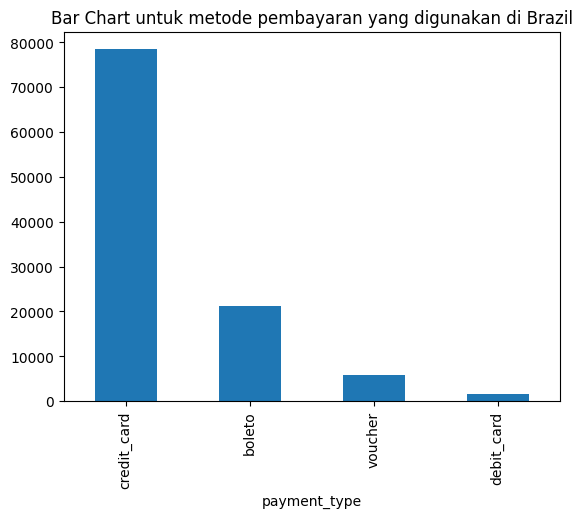

In [39]:
result_clean.payment_type.value_counts().plot.bar(title = "Bar Chart untuk metode pembayaran yang digunakan di Brazil")

### Pertanyaan 4: daerah (state) mana yang paling sering membeli produk e-commerce di Brazil?


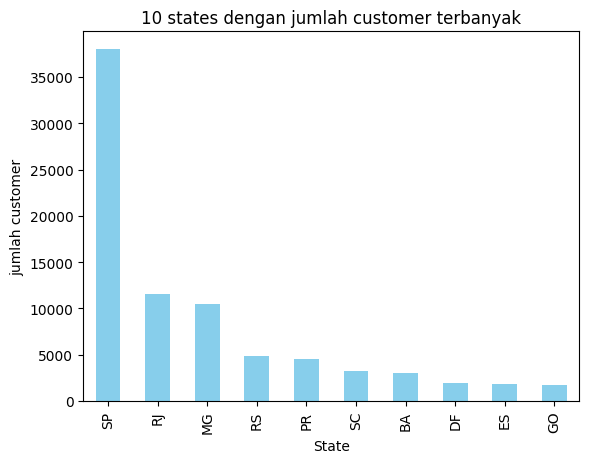

In [44]:
state_terbanyak = result_clean.groupby('customer_state')['customer_id'].nunique().sort_values(ascending=False).head(10)

state_terbanyak.plot(kind = 'bar', color = 'skyblue')
plt.title('10 states dengan jumlah customer terbanyak')
plt.xlabel('State')
plt.ylabel('jumlah customer')

plt.show()


## Conclusion

- terlihat bahwa pesebaran data price cenderung right-skewed, yang menandakan bahwa nilai modus nya kurang dari nilai rata-rata. hal ini menunjukkan bahwa kebanyakan konsumen cenderung membeli barang yang harganya kurang dari harga rata-rata, yaitu < 83.83. selain itu, terlihat bahwa konsumen cenderung membei barang dengan harga kurang dari 300. data ini diambil dari tahun 2016 hingga 2018.

- terlihat bahwa 10 jenis produk teratas yang dibeli adalah: 
1. bed_bath_table               
2. health_beauty                
3. furniture_decor              
4. sports_leisure               
5. computers_accessories
6. housewares
7. watches_gifts
8. telephony
9. garden_tools
10. auto

- terlihat bahwa metode pembayaran yang paling sering digunakan untuk berbelanja e-commerce di Brazil adalah credit card

- terlihat bahwa 10 state dengan jumlah customer terbanyak adalah
1. SP    
2. RJ    
3. MG   
4. RS     
5. PR     
6. SC     
7. BA    
8. DF    
9. ES     
10. GO 